# Aviation Accident Database & Synopses, up to 2023

## Overview¶
This project analyzes data from the "Aviation Accident Database & Synopses" dataset to identify the safest and most cost-effective
aircraft for a company looking to expand into the aviation industry. By reviewing accident and incident data, aircraft safety 
records, maintenance issues, and operational contexts, the project aims to provide actionable insights for minimizing risks and 
optimizing operational efficiency.

## Business Understanding
As the company diversifies its portfolio into the aviation sector, it faces significant risks associated with aircraft safety,
maintenance costs, and operational efficiency. Selecting the right aircraft is crucial for ensuring the success of this new
business endeavor. The aviation industry is highly competitive and regulated, requiring careful consideration of multiple
factors to ensure safe, reliable, and cost-effective operations.

## Data Understanding
The "Aviation Accident Database & Synopses, up to 2023" from Kaggle is a comprehensive dataset containing detailed information
about aviation accidents and incidents. This dataset provides critical insights into various aspects of aviation safety and 
operational efficiency. For our analysis, we focus on the following key components of the dataset:

Accident and Incident Data: This includes detailed records of aviation accidents and incidents, encompassing data points such 
as the date, location, and severity of each event 

Aircraft Information: Details about the aircraft involved in each accident or incident, including model, manufacturer,
and Engine ytpe, Number of engines and purpose of the flight.

Synopsis: Brief summaries of each accident or incident, providing context and initial findings.
Cause and Contributing Factors: Information on the identified causes and contributing factors for each event.

Weather Conditions: Weather data at the time of each accident or incident.



# IMPORTS AND DATA

In [8]:
# importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the Dataframe

In [10]:
#Loading the Aviation data
df = pd.read_csv('AviationData.csv', encoding='ISO-8859-1',low_memory=False)
df.head(3)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,10/24/1948,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,7/19/1962,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,8/30/1974,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007


## Summary statistics of data

In [12]:
#Finding summary statistics about our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [13]:
#Getting the dimensions of the dataframe
df.shape

(88889, 31)

## Data Preparation

## Handling Missing Values in the dataframe
Based on the summary statistics, many columns have missing values. Columns with over 50% missing data will be dropped, while the remaining columns will be addressed by filling in or replacing the missing values according to the data analysis.

We will now count the missing values in the dataframe to identify which columns have more than 50% missing values.

In [16]:
#finding the sum of the missing values in the dataframe
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

## What is the percentage of the missing values

In [18]:
#Getting the percentage of missing values in the dataframe
percent_missing = ((df.isna().sum())/88889)*100
percent_missing

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.058500
Country                    0.254250
Latitude                  61.320298
Longitude                 61.330423
Airport.Code              43.601570
Airport.Name              40.708074
Injury.Severity            1.124999
Aircraft.damage            3.593246
Aircraft.Category         63.677170
Registration.Number        1.554748
Make                       0.070875
Model                      0.103500
Amateur.Built              0.114750
Number.of.Engines          6.844491
Engine.Type                7.982990
FAR.Description           63.974170
Schedule                  85.845268
Purpose.of.flight          6.965991
Air.carrier               81.271023
Total.Fatal.Injuries      12.826109
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Uninjured            6.650992
Weather.Condition          5

From the statistics above, nearly half of the columns with missing data have over 50% missing values. Since this amount of
data is insufficient and may not contribute meaningfully to the analysis, we will drop these columns

## Dropping columns with missing values greater than 50%

In [21]:
#dropping columns with missing percentage greater than 50%
greater_50 = percent_missing[percent_missing>50].index
df.drop(labels=greater_50, inplace=True, axis=1)

greater_50

Index(['Latitude', 'Longitude', 'Aircraft.Category', 'FAR.Description',
       'Schedule', 'Air.carrier'],
      dtype='object')

In [22]:
#confirming if the columns with more than 50% missing values, have been dropped.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Airport.Code            50132 non-null  object 
 7   Airport.Name            52704 non-null  object 
 8   Injury.Severity         87889 non-null  object 
 9   Aircraft.damage         85695 non-null  object 
 10  Registration.Number     87507 non-null  object 
 11  Make                    88826 non-null  object 
 12  Model                   88797 non-null  object 
 13  Amateur.Built           88787 non-null  object 
 14  Number.of.Engines       82805 non-null

In [23]:
df.shape

(88889, 25)

## Dealing with Outliers

Handling missing values (imputing, removing, or flagging them).

Removing duplicates.

Addressing outliers and anomalies.

## Removing duplicates

In [27]:
# Identifying duplicate rows considering all columns
duplicates = df.duplicated()
duplicates

0        False
1        False
2        False
3        False
4        False
         ...  
88884    False
88885    False
88886    False
88887    False
88888    False
Length: 88889, dtype: bool

In [28]:
# Displaying all duplicate rows
duplicate_rows = df[duplicates]
duplicate_rows

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date


From the observation above , there are no duplicates

In the remaining columns, some contain complete data, while others still have missing values, albeit less than 50%. It's not 
advisable to drop columns with very few missing values as this data could be valuable for our analysis, and we also aim to
uphold data integrity.

During our exploratory data analysis, if columns with missing values prove to be useful, we will proceed to fill or
replace these missing values."

## EXPLORATORY DATA ANALYSIS (EDA)¶

Our primary business recommendation as we endeavor to identify the safest and most cost-effective aircraft for a company 
venturing into the aviation industry is to prioritize aircraft with established safety records.

## Identifying Aircrafts with Proven Safety Records¶¶
Analyzing the Aircrafts Safety Records is crucial to ensuring the safety, financial stability, reputation, regulatory compliance,
and long-term viability of the company's aviation division.

We will thus concentrate on the following columns to assist us in analyzing and identifying the aircraft with the best safety 
records.

## 1a. Filtering the dataframe to relevant Data only
To include only columns related to Aircraft Condition and Performance

In [68]:
# Select columns related to aircraft condition and performance
relevant_columns = [
    'Weather.Condition', 'Event.Date', 'Country', 'Aircraft.damage', 
    'Make', 'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 
    'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured','Purpose.of.flight' 
]
aircraft_data = df.loc[:,(relevant_columns)]
aircraft_data

,Weather.Condition,Event.Date,Country,Aircraft.damage,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Purpose.of.flight
0,UNK,10/24/1948,United States,Destroyed,Stinson,108-3,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,Personal
1,UNK,7/19/1962,United States,Destroyed,Piper,PA24-180,No,1.0,Reciprocating,4.0,0.0,0.0,0.0,Personal
2,IMC,8/30/1974,United States,Destroyed,Cessna,172M,No,1.0,Reciprocating,3.0,0.0,0.0,1.0,Personal
3,IMC,6/19/1977,United States,Destroyed,Rockwell,112,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,Personal
4,VMC,8/2/1979,United States,Destroyed,Cessna,501,No,NaN,NaN,1.0,2.0,0.0,0.0,Personal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,NaN,12/26/2022,United States,NaN,PIPER,PA-28-151,No,NaN,NaN,0.0,1.0,0.0,0.0,Personal
88885,NaN,12/26/2022,United States,NaN,BELLANCA,7ECA,No,NaN,NaN,0.0,0.0,0.0,0.0,NaN
88886,VMC,12/26/2022,United States,Substantial,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,0.0,0.0,0.0,1.0,Personal
88887,NaN,12/26/2022,United States,NaN,CESSNA,210N,No,NaN,NaN,0.0,0.0,0.0,0.0,Personal


### Dealing with Missing values in the relevant columns

Dealing with missing data is crucial in data analysis and decision-making for several reasons:

Ensuring Data Quality and Integrity Improving Model Performance Enabling Comprehensive Analysis Facilitating Robustness in
Decision-Making

In [70]:
#The .info() method in pandas provides a concise summary of a DataFrame. 
aircraft_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Weather.Condition       84397 non-null  object 
 1   Event.Date              88889 non-null  object 
 2   Country                 88663 non-null  object 
 3   Aircraft.damage         85695 non-null  object 
 4   Make                    88826 non-null  object 
 5   Model                   88797 non-null  object 
 6   Amateur.Built           88787 non-null  object 
 7   Number.of.Engines       82805 non-null  float64
 8   Engine.Type             81793 non-null  object 
 9   Total.Fatal.Injuries    88889 non-null  float64
 10  Total.Serious.Injuries  88889 non-null  float64
 11  Total.Minor.Injuries    88889 non-null  float64
 12  Total.Uninjured         88889 non-null  float64
 13  Purpose.of.flight       82697 non-null  object 
dtypes: float64(5), object(9)
memory usage:

In [72]:
### Lets start by counting the sum of missing values 
aircraft_data.isna().sum()

Weather.Condition         4492
Event.Date                   0
Country                    226
Aircraft.damage           3194
Make                        63
Model                       92
Amateur.Built              102
Number.of.Engines         6084
Engine.Type               7096
Total.Fatal.Injuries         0
Total.Serious.Injuries       0
Total.Minor.Injuries         0
Total.Uninjured              0
Purpose.of.flight         6192
dtype: int64

According to the summary statistics, there are a few columns with missing data that are categorical, while the remaining columns 
with missing values are numerical. The best approach to deal with categorical data is imputing using 'mode' or considering a
separate category for missing values ,while for numerical data is either dropping the column/rows or imputing them using median, 
mean and mode

### Lets start by dealing with Missing values in columns with Numerical data

In [76]:
#imputing missing values in the column 'Number.of.Engines' with mode
pd.options.mode.chained_assignment
number_of_engine_mode = aircraft_data['Number.of.Engines'].mode()[0]
aircraft_data['Number.of.Engines'].fillna(number_of_engine_mode, inplace=True)
#df['Number.of.Engines'].fillna(df['Number.of.Engines'].mode(), inplace=True)

# we shall impute misssing values using median in the following columns due to skewed data
aircraft_data['Total.Fatal.Injuries'].fillna(aircraft_data['Total.Fatal.Injuries'].median(), inplace=True)
aircraft_data['Total.Serious.Injuries'].fillna(aircraft_data['Total.Serious.Injuries'].median(), inplace=True)
aircraft_data['Total.Minor.Injuries'].fillna(aircraft_data['Total.Minor.Injuries'].median(), inplace=True)
aircraft_data['Total.Uninjured'].fillna(aircraft_data['Total.Uninjured'].median(), inplace=True)

### Dealing with Missing data in columns with Categorical data

In [78]:
 aircraft_data.dropna(inplace=True)
aircraft_data.isna().sum()

Weather.Condition         0
Event.Date                0
Country                   0
Aircraft.damage           0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Purpose.of.flight         0
dtype: int64

In [82]:
aircraft_data.shape

(76991, 14)

In [44]:
#imputing the missing values using mode

# Fill missing values in 'Aircraft.damage' with the mode
aircraft_damage_mode = df['Aircraft.damage'].mode()[0]
df['Aircraft.damage'].fillna(aircraft_damage_mode, inplace=True)

# Fill missing values in 'Country' with the mode
country_mode = df['Country'].mode()[0]
df['Country'].fillna(country_mode, inplace=True)

# Fill missing values in 'Make' with the mode
make_mode = df['Make'].mode()[0]
df['Make'].fillna(make_mode, inplace=True)

# Fill missing values in 'Model' with the mode
model_mode = df['Model'].mode()[0]
df['Model'].fillna(model_mode, inplace=True)

# Fill missing values in 'Ameteur.Built' with the mode
Amateur_built_model = df['Amateur.Built'].mode()[0]
df['Amateur.Built'].fillna(Amateur_built_model, inplace=True)

# Fill missing values in 'Engine.Type' with the mode
Eingine_type_mode = df['Engine.Type'].mode()[0]
df['Engine.Type'].fillna(country_mode, inplace=True)

# Fill missing values in 'Purpose .of.Flight' with the mode
purpose_of_the_flight = df['Purpose.of.flight'].mode()[0]
df['Purpose.of.flight'].fillna(country_mode, inplace=True)


In [84]:
aircraft_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76991 entries, 0 to 88767
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Weather.Condition       76991 non-null  object 
 1   Event.Date              76991 non-null  object 
 2   Country                 76991 non-null  object 
 3   Aircraft.damage         76991 non-null  object 
 4   Make                    76991 non-null  object 
 5   Model                   76991 non-null  object 
 6   Amateur.Built           76991 non-null  object 
 7   Number.of.Engines       76991 non-null  float64
 8   Engine.Type             76991 non-null  object 
 9   Total.Fatal.Injuries    76991 non-null  float64
 10  Total.Serious.Injuries  76991 non-null  float64
 11  Total.Minor.Injuries    76991 non-null  float64
 12  Total.Uninjured         76991 non-null  float64
 13  Purpose.of.flight       76991 non-null  object 
dtypes: float64(5), object(9)
memory usage: 8.8+

From the observation above, there are no rows with missing values. since most of the columns with missing values have been
'filled'.Therefore our dataset is free from missing values

### checking for duplicate values in the aircraft_data

In [88]:
# Identifying duplicate rows considering all columns
duplicates = aircraft_data.duplicated().sum()
duplicates

169

In [90]:
aircraft_data = aircraft_data.drop_duplicates()
duplicates = aircraft_data.duplicated().sum()
duplicates

0

In [96]:
#getting the counts of duplicated values
aircraft_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76822 entries, 0 to 88767
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Weather.Condition       76822 non-null  object 
 1   Event.Date              76822 non-null  object 
 2   Country                 76822 non-null  object 
 3   Aircraft.damage         76822 non-null  object 
 4   Make                    76822 non-null  object 
 5   Model                   76822 non-null  object 
 6   Amateur.Built           76822 non-null  object 
 7   Number.of.Engines       76822 non-null  float64
 8   Engine.Type             76822 non-null  object 
 9   Total.Fatal.Injuries    76822 non-null  float64
 10  Total.Serious.Injuries  76822 non-null  float64
 11  Total.Minor.Injuries    76822 non-null  float64
 12  Total.Uninjured         76822 non-null  float64
 13  Purpose.of.flight       76822 non-null  object 
dtypes: float64(5), object(9)
memory usage: 8.8+

### a. Which make of an aircraft has highest counts ?

In [98]:
#I want to understand which make of an aircraft has the highest counts

make_upper_case = aircraft_data['Make'].str.upper().value_counts()
print(make_upper_case)

top_10_makes = aircraft_data['Make'].value_counts(normalize=True, dropna=False)[:10] * 100
top_10_makes

Make
CESSNA                 25023
PIPER                  13827
BEECH                   4856
BELL                    2167
MOONEY                  1260
                       ...  
DEAN                       1
PARKMAN                    1
DENNIS POINTER             1
MICHAEL L. THIBAULT        1
STEPHEN J HOFFMAN          1
Name: count, Length: 7015, dtype: int64


Make
Cessna      27.807139
Piper       15.150608
Beech        5.369556
CESSNA       4.765562
PIPER        2.848142
Bell         2.400354
Mooney       1.394132
Grumman      1.385020
Bellanca     1.145505
Robinson     1.105152
Name: proportion, dtype: float64

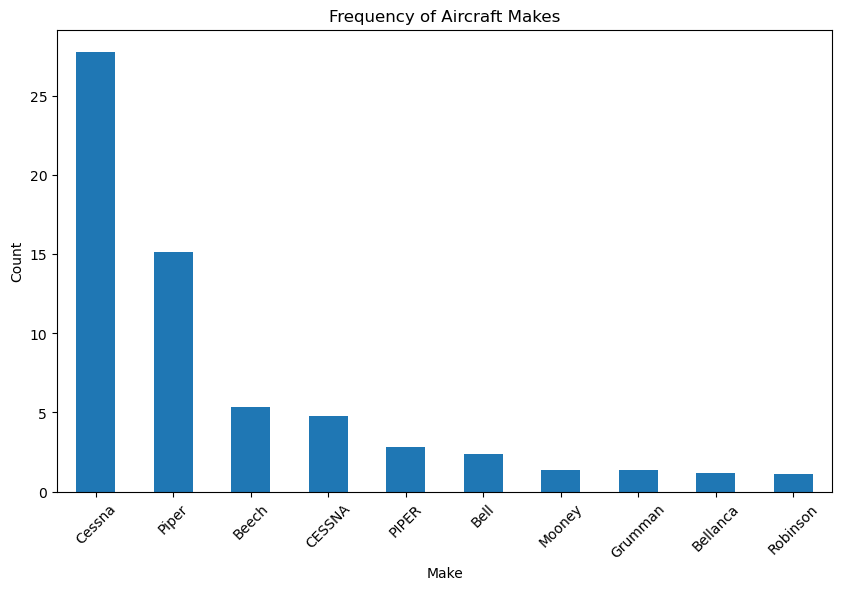

<Figure size 640x480 with 0 Axes>

In [100]:
# Plotting a simple  bar graph using matplotlib
plt.figure(figsize=(10, 6))
top_10_makes.plot(kind='bar')
plt.title('Frequency of Aircraft Makes')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.savefig('freqMakes.png')

Based on the chart, Cessna aircraft have the highest frequency, comprising 25% of all observed counts, which is notably the
highest. Following Cessna is , Piper with 13%, Beech, and Boeing are also prominent. Our interest now turns to determining 
which of these makes recorded the highest total injuries and which had the highest instances of being uninjured.

### Creating a new column of 'Total.Injuries

In [108]:
# Calculating total injuries (fatal, serious, minor) to assess severity
aircraft_data.loc[:,'Total.Injuries'] = aircraft_data['Total.Fatal.Injuries'] + aircraft_data['Total.Serious.Injuries'] + aircraft_data['Total.Minor.Injuries']


### b. Analyzing trends and patterns to identify which 'Make' has the highest number number of injuries.

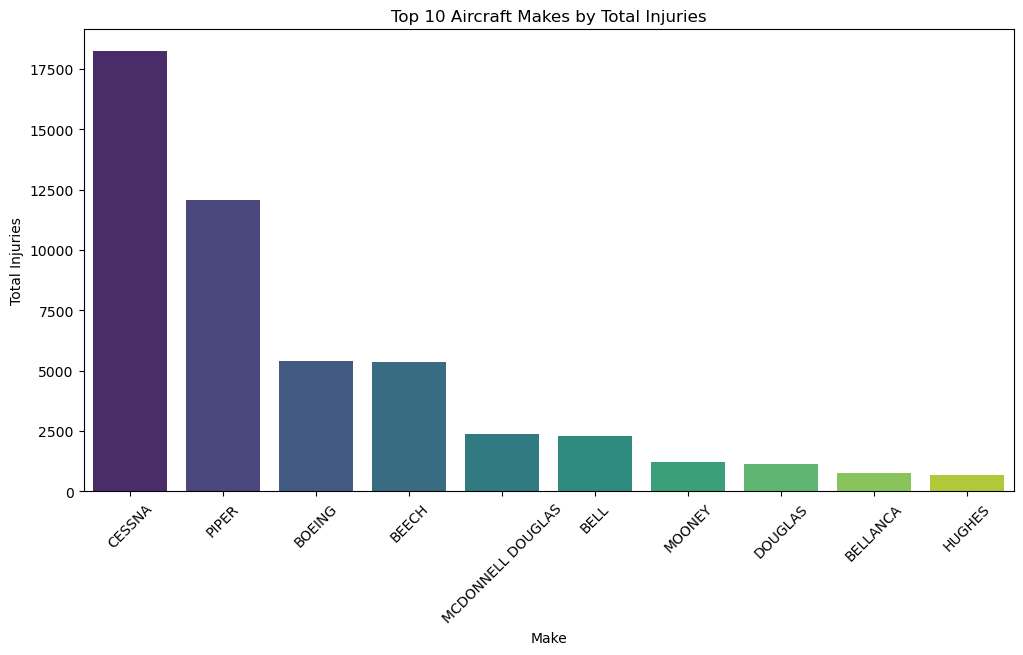

In [116]:
#want to plot Make against highest number of total injuries
aircraft_data.loc[:,'Make'] = aircraft_data['Make'].str.upper()

# Group by 'Make' and sum the 'Total.Injuries'
make_injuries = aircraft_data.groupby('Make')['Total.Injuries'].sum().reset_index()

# Sort by Total Injuries and select top 10 makes
top_10_makes = make_injuries.sort_values(by='Total.Injuries', ascending=False).head(10)

# Plotting the top 10 makes by total injuries
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_makes, x='Make', y='Total.Injuries', palette='viridis')
plt.title('Top 10 Aircraft Makes by Total Injuries')
plt.xlabel('Make')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45)
plt.show()

Once more, according to the chart, aircraft makes such as Cessna, Boeing, Piper, and Beech. consistently show higher numbers
of injuries, followed closely by 'MACDONNEL DOUGLAS','BELL','AIRBUS'. Now, let's delve deeper to determine which make has
the highest count of uninjured cases, allowing for a comprehensive analysis to understand why these particular makes are 
associated with such significant case numbers.

### Plotting 'Make' against highest number of 'Total.Uninjured'

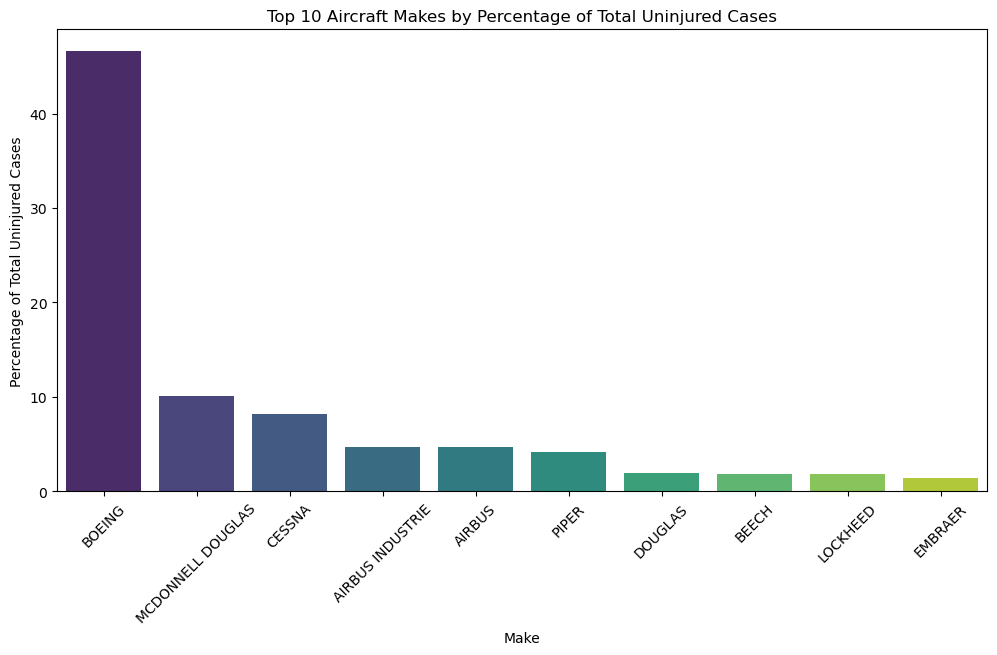

In [68]:
# Group by 'Make' and sum the 'Total.Uninjured'
make_uninjured = aircraft_data.groupby('Make')['Total.Uninjured'].sum().reset_index()

# Calculate the total uninjured cases across all makes
total_uninjured_cases = make_uninjured['Total.Uninjured'].sum()

# Calculate percentage of total uninjured cases for each make
make_uninjured['Percentage.Uninjured'] = (make_uninjured['Total.Uninjured'] / total_uninjured_cases) * 100

# Sort by Percentage.Uninjured and select top 10 makes
top_10_makes_uninjured = make_uninjured.sort_values(by='Percentage.Uninjured', ascending=False).head(10)

# Plotting the top 10 makes by percentage of total uninjured cases
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_makes_uninjured, x='Make', y='Percentage.Uninjured', palette='viridis')
plt.title('Top 10 Aircraft Makes by Percentage of Total Uninjured Cases')
plt.xlabel('Make')
plt.ylabel('Percentage of Total Uninjured Cases')
plt.xticks(rotation=45)
plt.show()


Previously, 'CESSNA', 'BOEING', 'PIPER', and 'BEECH' showed the highest total injuries. In the latest observation, 'BOEING',
'MCDONNEL DOUGLAS','CESSNA' and 'AIRBUS' have taken the lead in total uninjured cases.With 'BOEING' takin lead by over  This raises the question whether these
numbers represent passengers aboard these aircraft, suggesting a preference for these makes.

### C. Trends of injuries and uninjured overtime

In [149]:
# Set option to handle inf as NaN globally
#pd.set_option('mode.use_inf_as_na', True)

# Convert 'Event.Date' to datetime format
aircraft_data.loc[:, 'Date'] = pd.to_datetime(aircraft_data['Event.Date'])

print(aircraft_data['Date'].dtype)

# Example: Convert 'Date' column to datetime
#df['Date'] = pd.to_datetime(df['Date'])

# Extract year from 'Event.date'
aircraft_data.loc[:, 'Year'] = aircraft_data['Date'].dt.year

datetime64[ns]


Aggregated Data (Total Injuries and Total Uninjured) Over Years by Make:
     Year    Make  Total.Injuries  Total.Uninjured
0    1962   PIPER             4.0              0.0
1    1974  CESSNA             3.0              1.0
2    1981  CESSNA             4.0              0.0
3    1982   BEECH           244.0            378.0
4    1982  BOEING           297.0            843.0
..    ...     ...             ...              ...
162  2021   PIPER            15.0            105.0
163  2022   BEECH             2.0             15.0
164  2022  BOEING             2.0              2.0
165  2022  CESSNA            49.0            165.0
166  2022   PIPER            11.0             91.0

[167 rows x 4 columns]


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


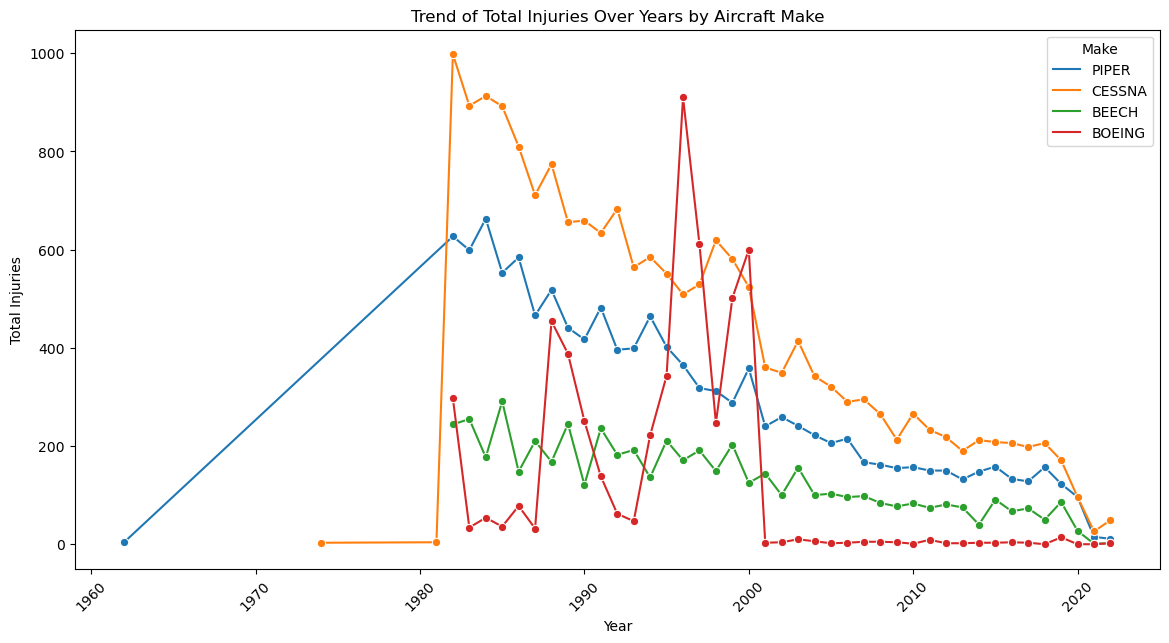

In [137]:
# Filter for common makes
common_makes = ['CESSNA', 'BOEING', 'PIPER', 'BEECH']
aircraft_data.loc[:,'Make'] = aircraft_data['Make'].str.upper()
filtered_data = aircraft_data[aircraft_data['Make'].isin(common_makes)]

# Group by 'Year' and 'Make' and sum the 'Total.Injuries' and 'Total.Uninjured'
trend_data = filtered_data.groupby(['Year', 'Make']).agg({
    'Total.Injuries': 'sum',
    'Total.Uninjured': 'sum'
}).reset_index()

# Display the aggregated data before plotting
print("Aggregated Data (Total Injuries and Total Uninjured) Over Years by Make:")
print(trend_data)

# Plotting the trend of total injuries over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=trend_data, x='Year', y='Total.Injuries', hue='Make', marker='o')
plt.title('Trend of Total Injuries Over Years by Aircraft Make')
plt.xlabel('Year')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45)
plt.legend(title='Make')
plt.show()


### Comments:
Based on the data analysis, while all common makes have shown reductions in both injury and uninjured cases over time, Boeing stands out with
significant improvement in safety - this is particularly because it had the highest accident numbers between the years 1990 to 2001. Cessna also shows positive trends, particularly for smaller aircraft
operations. Continuous vigilance and adherence to safety protocols remain crucial in aviation operations to maintain and improve safety standards
further.

### d. Does the number of Engine  and  Engine type matter?

In [126]:
# List of common makes (replace with your actual common makes)
#common_makes = ['Boeing', 'Cessna', 'Piper']
common_makes = ['CESSNA', 'BOEING', 'PIPER', 'BEECH']

# Filter data for common makes
filtered_data = aircraft_data[aircraft_data['Make'].isin(common_makes)]

# Count frequencies of Make by Weather.Condition
make_weather_counts = filtered_data.groupby(['Make', 'Engine.Type']).size().reset_index(name='Count')
make_weather_counts

,Make,Engine.Type,Count
0,BEECH,Reciprocating,4314
1,BEECH,Turbo Fan,10
2,BEECH,Turbo Jet,4
3,BEECH,Turbo Prop,475
4,BEECH,Turbo Shaft,2
5,BEECH,Unknown,51
6,BOEING,Reciprocating,355
7,BOEING,Turbo Fan,306
8,BOEING,Turbo Jet,78
9,BOEING,Turbo Prop,2


In [134]:
# Filter for rows where Make is 'Boeing'
boeing_data = aircraft_data[aircraft_data['Make'] == 'CESSNA']

# List unique engine types for Boeing
boeing_engine_types = boeing_data['Engine.Type'].unique()

print("Engine types for Boeing:")
print(boeing_engine_types)

Engine types for Boeing:
['Reciprocating' 'Turbo Jet' 'Turbo Prop' 'Turbo Fan' 'Unknown' 'UNK']


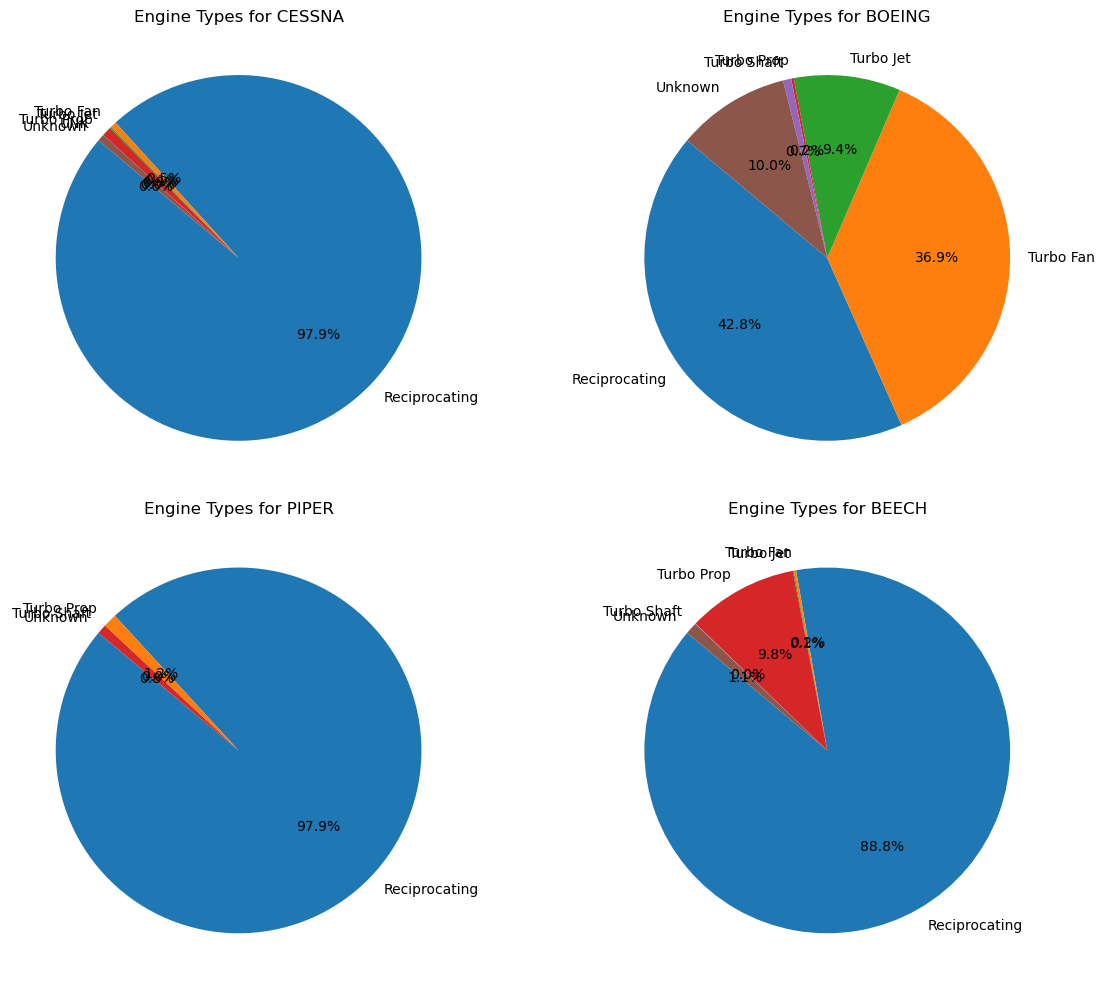

In [128]:

# Plotting a pie chart for each make
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()

# Loop through each make
for i, make in enumerate(common_makes):
    # Filter data for the current make
    data = make_weather_counts[make_weather_counts['Make'] == make]
    
    # Plot pie chart
    axes[i].pie(data['Count'], labels=data['Engine.Type'], autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'Engine Types for {make}')
    
# Adjust layout
plt.tight_layout()
plt.show()


It is clear from the pie charts that the Reciprocating type of engine is involved more in accidents. CESSNA *make* has an extremely high number of engines of this type involved in accidents (97%).

### e. What was the weather condition

In [157]:
# List of common makes (replace with your actual common makes)
#common_makes = ['Boeing', 'Cessna', 'Piper']
common_makes = ['CESSNA', 'BOEING', 'PIPER', 'BEECH']

# Filter data for common makes
filtered_data = aircraft_data[aircraft_data['Make'].isin(common_makes)]

# Count frequencies of Make by Weather.Condition
make_weather_counts = filtered_data.groupby(['Make', 'Weather.Condition']).size().reset_index(name='Count')
make_weather_counts


,Make,Weather.Condition,Count
0,BEECH,IMC,708
1,BEECH,UNK,68
2,BEECH,VMC,4080
3,BOEING,IMC,77
4,BOEING,UNK,61
5,BOEING,VMC,692
6,CESSNA,IMC,1765
7,CESSNA,UNK,264
8,CESSNA,VMC,22994
9,PIPER,IMC,1307


In [161]:
#want to plot Weather condition against highest number of total injuries
aircraft_data.loc[:,'Weather.Condition'] = aircraft_data['Weather.Condition'].str.upper()

# Group by 'Weather Condition' and sum the 'Total.Injuries'
weather_condition_injuries = aircraft_data.groupby('Weather.Condition')['Total.Injuries'].sum().reset_index()

# Sort by Total Injuries and select top  weather conditions
top_weather_conditions = weather_condition_injuries.sort_values(by='Total.Injuries', ascending=False)
top_weather_conditions

,Weather.Condition,Total.Injuries
2,VMC,56041.0
0,IMC,12792.0
1,UNK,3201.0


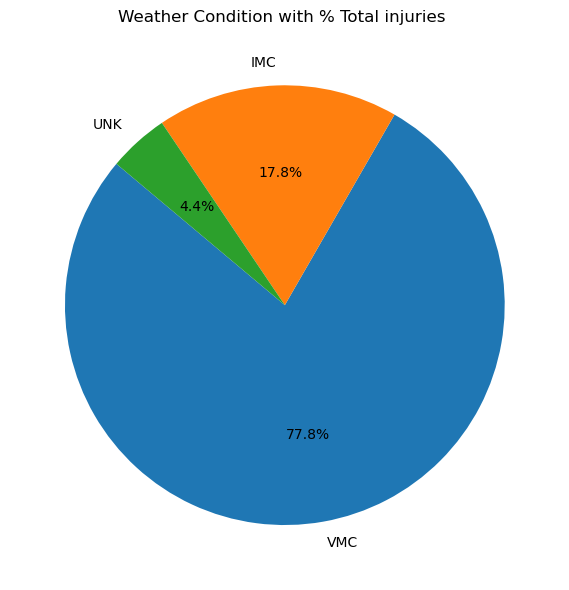

In [185]:

# Plotting a pie chart for each make
plt.figure(figsize=(12, 6))


# Plot pie chart
plt.pie(top_weather_conditions['Total.Injuries'], labels=top_weather_conditions['Weather.Condition'], autopct='%1.1f%%', startangle=140)
plt.title(f'Weather Condition with % Total injuries ')

# Adjust layout
plt.tight_layout()
plt.show()



### Comments
VMC is the leading weather condition correlated to high number of accidents with the most injuries according to the above pie chart(77.8%), while UNK weather condition contributes the least to total injuries(4.4%)

### f. Purpose of the flight

In [169]:


# Group by 'Weather Condition' and sum the 'Total.Injuries'
make_purpose_counts = aircraft_data.groupby('Purpose.of.flight')['Total.Injuries'].sum().reset_index()


top_10_make_purpose_counts = make_purpose_counts.sort_values(by='Total.Injuries', ascending=False).head(50)
top_10_make_purpose_counts

,Purpose.of.flight,Total.Injuries
18,Personal,39317.0
25,Unknown,15877.0
14,Instructional,5003.0
7,Business,3902.0
1,Aerial Application,1812.0
15,Other Work Use,1146.0
19,Positioning,1060.0
2,Aerial Observation,824.0
20,Public Aircraft,757.0
8,Executive/corporate,721.0


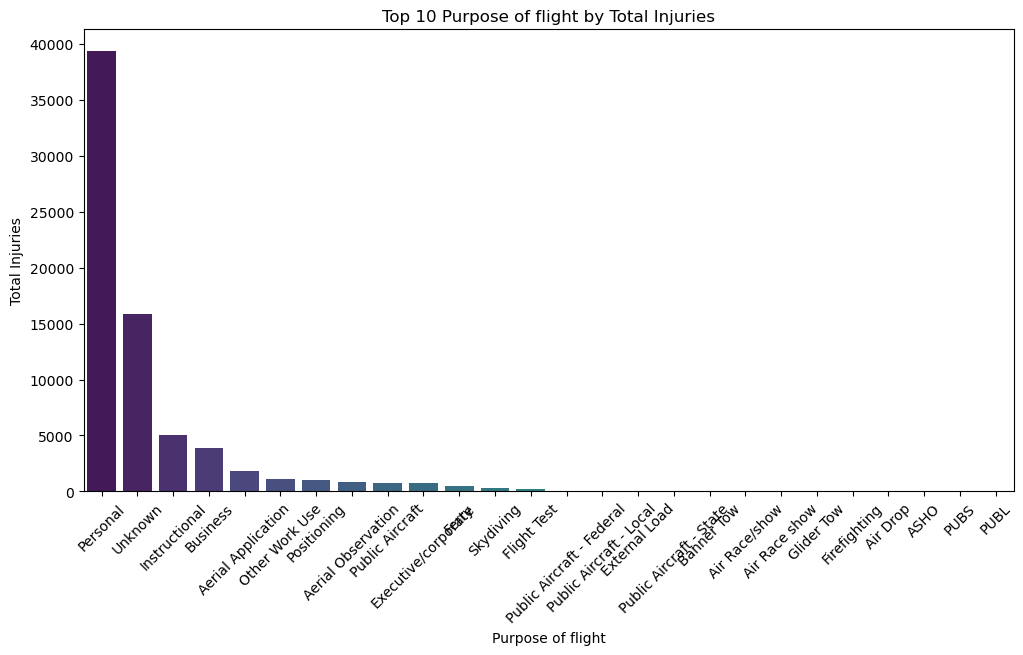

In [173]:
# Plotting the top 10 Weather.Conditions by total injuries
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_make_purpose_counts, x='Purpose.of.flight', y='Total.Injuries', palette='viridis')
plt.title('Top 10 Purpose of flight by Total Injuries')
plt.xlabel('Purpose of flight')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45)
plt.show()

### Final Analysis: Grouping Make by Countries

In [84]:
# Filter data for common makes
filtered_data = aircraft_data[aircraft_data['Make'].isin(common_makes)]

# Count frequencies of Make by Weather.Condition
make_country_counts = filtered_data.groupby(['Make', 'Country']).size().reset_index(name='Count').head(100)
make_country_counts

,Make,Country,Count
0,BEECH,ATLANTIC OCEAN,5
1,BEECH,American Samoa,1
2,BEECH,Angola,2
3,BEECH,Antarctica,1
4,BEECH,Antigua And Barbuda,1
...,...,...,...
95,BOEING,Benin,1
96,BOEING,Bolivia,4
97,BOEING,Brazil,34
98,BOEING,Bulgaria,1


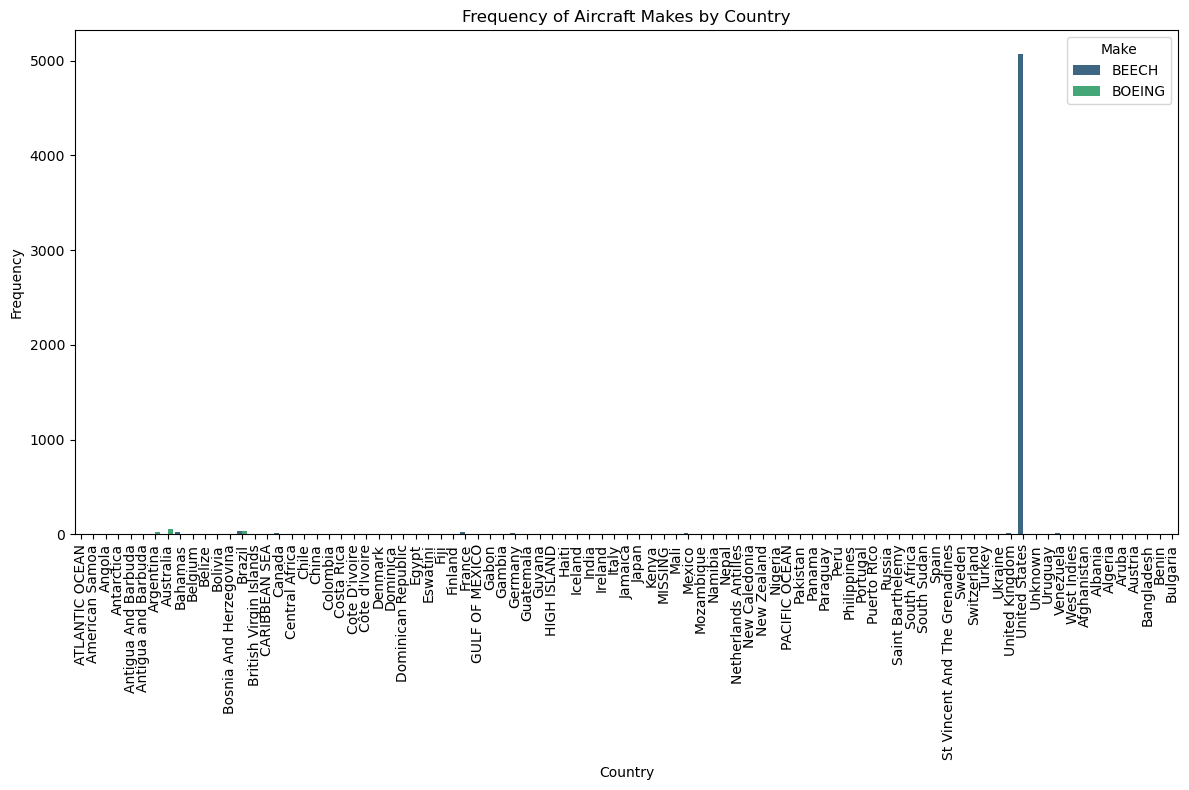

In [85]:

# Assuming make_country_counts contains your data
plt.figure(figsize=(12, 8))
sns.barplot(data=make_country_counts, x='Country', y='Count', hue='Make', palette='viridis')
plt.title('Frequency of Aircraft Makes by Country')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.legend(title='Make', loc='upper right')
plt.tight_layout()
plt.show()

Based on the observations above, the majority of the data pertains to airplanes from the United States. Other countries have relatively
fewer entries for their aircraft. Specifically, approximately 90% of the aircraft attributed to the 'Boeing' make originate from the United States.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3028\3995620805.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


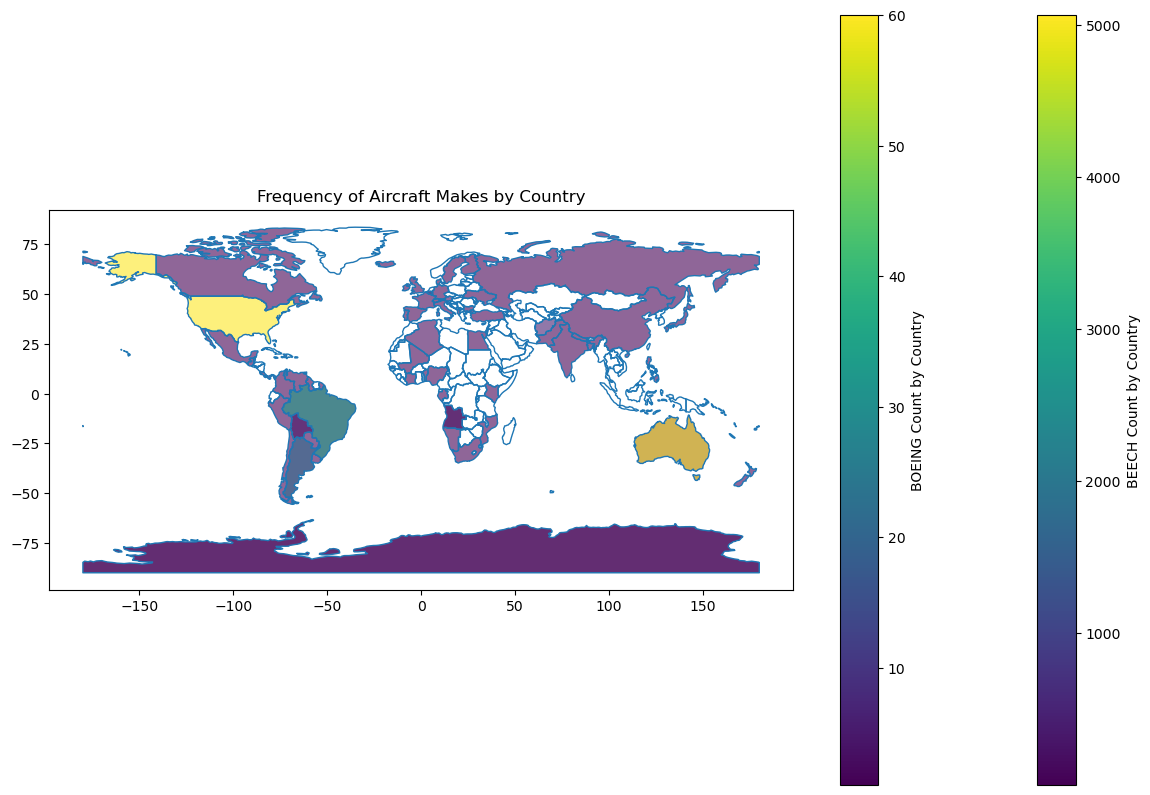

In [89]:

import geopandas as gpd
# Ensure country names match between your data and the geopandas dataset
make_country_counts['Country'] = make_country_counts['Country'].replace({
    'United States': 'United States of America'
})

# Load a world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge your data with the world map data
merged = world.merge(make_country_counts, how='left', left_on='name', right_on='Country')

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1)

# Plot each aircraft make
for make in make_country_counts['Make'].unique():
    merged_make = merged[merged['Make'] == make]
    merged_make.plot(column='Count', ax=ax, legend=True, legend_kwds={'label': f"{make} Count by Country"},
                     missing_kwds={"color": "lightgrey"}, cmap='viridis', markersize=merged_make['Count']*10, alpha=0.6)

plt.title('Frequency of Aircraft Makes by Country')
plt.show()

## Final Recommendation and Conclusion for Business Aircraft Selection

### Observations:
##### Frequency of Aircraft Makes:

Cessna: Comprises 25% of all observed counts, the highest among the aircraft makes.
Piper: Accounts for 13%, followed by Beech and Boeing, which are also prominent.

##### Injury and Uninjured Cases:
High Total Injuries: Cessna, Boeing, Piper, and Beech show the highest total injuries.
High Uninjured Cases: Boeing, McDonnell Douglas, Cessna, and Airbus lead in total uninjured cases, with Boeing having the highest number of
uninjured cases.

#### Engine Types:
Reciprocating engines had the highest accident incidences with the most total injuries
    
#### Usage Patterns:
Beech: Mostly used for personal flights, followed by instructional and business purposes.
Boeing: Commonly used within the United States for personal flights and a smaller number for business.
Cessna: Primarily used for personal flights, with substantial usage for instructional purposes, business, and various operational needs 
like aerial applications.
                                                                   
#### Geographical Distribution:
Majority of the data pertains to airplanes from the United States, with approximately 90% of Boeing aircraft originating from the United States.
                                                                   
#### Safety Improvement:
Boeing: Demonstrates the most substantial improvement in reducing both injury and uninjured cases over time, suggesting effective safety enhancements.
Cessna: Consistently shows positive trends in safety improvement, particularly suitable for smaller aircraft operations.
Piper and Beech: Also show safety improvements but with generally lower case numbers compared to Boeing and Cessna.
                                                                   
### Recommendation:
Based on the comprehensive analysis, considering safety trends, usage patterns, and engine types, the following recommendations 
are made for selecting aircraft for business purposes:

#### Boeing:
Recommendation: Boeing is highly recommended due to its significant improvement in safety and its high frequency of uninjured cases.
Its robust safety record makes it a reliable choice for business purposes.
Usage: Suitable for larger-scale operations and flights primarily within the United States, making it ideal for extensive business travel.
                                                                                                     
#### Cessna:
Recommendation: Cessna is a strong contender, especially for smaller aircraft operations and versatility in usage. Its consistent safety
improvements make it a dependable choice.
Usage: Ideal for personal flights, instructional purposes, business, and specialized operations like aerial applications and observation.
                                                                                                     
#### Piper and Beech:
Recommendation: While they show improvements, they are more suited for specific needs and smaller operations compared to Boeing and Cessna.
They can be considered based on specific business requirements.
Usage: Beech is mainly for personal and instructional flights, while Piper is versatile but with lower overall numbers.
                                                                                                     

## Conclusion:
For business aviation purposes, Boeing aircraft emerge as the top recommendation due to their significant safety improvements and extensive
usage within the United States. Cessna aircraft also present a reliable option, particularly for versatile and smaller-scale operations. 
Both manufacturers have demonstrated strong commitments to safety, making them suitable choices for ensuring secure and efficient business travel.
Continuous monitoring of safety trends, adherence to maintenance practices, and compliance with regulatory changes remain crucial to maintaining 
and enhancing aviation safety standards.